Mikołaj Olesiński 272702

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt


# Poznanie zbioru danych

### Wczytanie zbioru danych Heart Disease z repozytorium UCI

In [4]:
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [5]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


**Zbiór cech (`X`):**  
Dane zawierają informacje medyczne o pacjentach, takie jak wiek, płeć, rodzaj bólu w klatce piersiowej (`cp`), ciśnienie krwi (`trestbps`), poziom cholesterolu (`chol`).  
Cechy mają zarówno charakter liczbowy, jak i kategoryczny (np. `sex`, `cp`, `restecg`, `thal`).

**Zmienna docelowa (`y`):**  
Kolumna `num` określa stopień występowania choroby serca (0 – brak choroby, wartości dodatnie – różne stopnie nasilenia choroby).  

### Przeglądamy metadane, aby zrozumieć kontekst i strukturę całego zbioru danych — skąd pochodzi, ile ma rekordów i cech, jaki ma cel badawczy 

In [6]:
heart_disease.metadata

{'uci_id': 45,
 'name': 'Heart Disease',
 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease',
 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv',
 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 303,
 'num_features': 13,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['num'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1989,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C52P4X',
 'creators': ['Andras Janosi',
  'William Steinbrunn',
  'Matthias Pfisterer',
  'Robert Detrano'],
 'intro_paper': {'ID': 231,
  'type': 'NATIVE',
  'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.',
  'authors': 'R. Detr

In [7]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


Z tych danych można wywnioskować, jakie m.in. typy mają dane czy są kategoryczne czy liczbowe. Oraz z pomocą również z https://archive.ics.uci.edu/dataset/45/heart+disease mozemy opisac analizowane cechy.

- **age** – Wiek pacjenta w latach (liczba całkowita)
- **sex** – Płeć pacjenta (kategoria): 1 = mężczyzna, 0 = kobieta
- **cp** – Typ bólu w klatce piersiowej (kategoria):
  - 1 = typowa dusznica bolesna
  - 2 = nietypowa dusznica bolesna
  - 3 = ból nie-dusznicowy
  - 4 = bezobjawowy
- **trestbps** – Ciśnienie krwi w spoczynku przy przyjęciu do szpitala (mm Hg)
- **chol** – Poziom cholesterolu we krwi (mg/dl)
- **fbs** – Cukier we krwi na czczo > 120 mg/dl (kategoria): 1 = prawda, 0 = fałsz
- **restecg** – Wyniki spoczynkowego EKG (kategoria):
  - 0 = normalny
  - 1 = zaburzenia ST-T (odwrócenie fali T lub uniesienie/obniżenie ST > 0.05 mV)
  - 2 = prawdopodobne lub pewne przerost lewej komory
- **thalach** – Maksymalne osiągnięte tętno (liczba całkowita)
- **exang** – Dławica wywołana wysiłkiem (kategoria): 1 = tak, 0 = nie
- **oldpeak** – Obniżenie odcinka ST wywołane wysiłkiem w stosunku do stanu spoczynkowego (liczba całkowita)
- **slope** – Nachylenie szczytowego odcinka ST (kategoria):
  - 1 = nachylenie w górę
  - 2 = płaskie
  - 3 = nachylenie w dół
- **ca** – Liczba głównych naczyń (0-3) uwidocznionych w fluoroskopii (liczba całkowita)
- **thal** – Wskaźnik perfuzji mięśnia sercowego (kategoria):
  - 3 = normalny
  - 6 = defekt stały
  - 7 = defekt odwracalny

####  Zmienna docelowa (target)

- **num** – Obecność choroby wieńcowej (liczba całkowita):
  - 0 = brak choroby (<50% zwężenia naczynia)
  - 1, 2, 3, 4 = obecność choroby (≥50% zwężenia naczynia)


# Zad1. Czy zbiór jest zbalansowany pod względem liczby próbek na klasy?

num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64


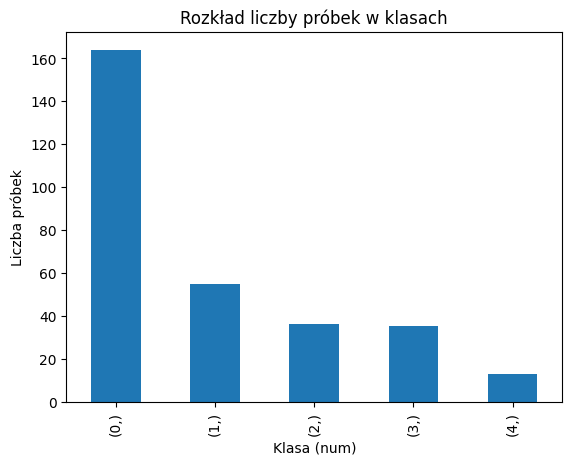

In [8]:
value_count = y.value_counts().sort_index()
print(value_count)
value_count.plot(kind='bar')
plt.xlabel('Klasa (num)')
plt.ylabel('Liczba próbek')
plt.title('Rozkład liczby próbek w klasach')
plt.show()


Rozkład klas jest nierównomierny — klasa `0` (brak choroby) występuje najczęściej (164 przypadki), natomiast klasy `3` i `4` (różne stopnie nasilenia) mają znacznie mniej obserwacji (35 i 13).  

num
0    160
1    137
Name: count, dtype: int64


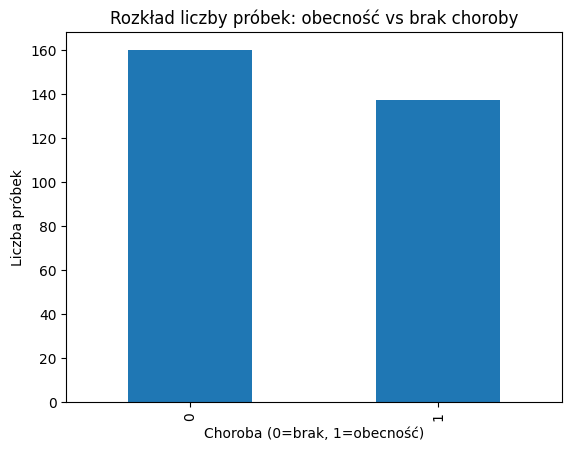

In [19]:
presence = y.apply(lambda x: 0 if x == 0 else 1)
print(presence.value_counts())
presence.value_counts().plot(kind='bar')
plt.xlabel('Choroba (0=brak, 1=obecność)')
plt.ylabel('Liczba próbek')
plt.title('Rozkład liczby próbek: obecność vs brak choroby')
plt.show()

Jezeli weźmiemy pod uwagę tak jak jest w tym fragmenncie 
>      58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing


 tylko dwie klasy: brak choroby (0) i obecność choroby (1,2,3,4) to mamy 164 próbki bez choroby i 138 z chorobą. Wtedy zbiór jest bardziej zbalansowany.

# Zad2. Jakie są średnie i odchylenia cech liczbowych?

Podzielenie cech liczbowych na kategoryczne i liczbowe uzywajac .variables

In [10]:
categorical_cols = heart_disease.variables[heart_disease.variables['type'] == 'Categorical']['name'].tolist()
integer_cols = heart_disease.variables[heart_disease.variables['type'] == 'Integer']['name'].tolist()
if 'num' in integer_cols:
    integer_cols.remove('num')

print("Cechy kategoryczne:", categorical_cols)
print("Cechy liczbowe:", integer_cols)

Cechy kategoryczne: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Cechy liczbowe: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']


In [11]:
X_numeric = X[integer_cols]
X_numeric.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


**Średnie i odchylenia standardowe:**

| Cecha    | Średnia | Odchylenie standardowe |
| -------- | ------- | ---------------------- |
| age      | 54.44   | 9.04                   |
| trestbps | 131.69  | 17.60                  |
| chol     | 246.69  | 51.78                  |
| thalach  | 149.61  | 22.88                  |
| oldpeak  | 1.04    | 1.16                   |
| ca       | 0.67    | 0.94                   |

**Wnioski:**

* age – Średni wiek pacjentów to około 54 lata. Rozrzut jest umiarkowany (odchylenie standardowe ~9), więc większość pacjentów jest w wieku 45–65 lat.

* trestbps – Średnie ciśnienie spoczynkowe wynosi ~132 mm Hg. Rozrzut jest umiarkowany (~18), czyli ciśnienie w populacji różni się umiarkowanie.

* chol – Średni poziom cholesterolu to 247 mg/dl, ale odchylenie standardowe jest dość duże (~52), co wskazuje na dużą zmienność i obecność pacjentów z bardzo wysokim cholesterolem.

* thalach – Maksymalne osiągnięte tętno średnio wynosi ~150 uderzeń/min, rozrzut umiarkowany (~23), większość pacjentów mieści się w przedziale 130–175 uderzeń/min.

* oldpeak – Średnia obniżenia ST to około 1, ale odchylenie standardowe jest prawie takie samo (~1,16), co pokazuje, że część pacjentów ma zerowe obniżenie, a inni znacznie większe wartości.

* ca – Średnia liczba głównych naczyń to 0,67. Rozrzut jest wysoki w stosunku do średniej (~0,94), większość pacjentów ma 0 naczyń, ale niektórzy mają 1–3, co daje duże zróżnicowanie.


# Zad3. Dla cech liczbowych: czy ich rozkład jest w przybliżeniu normalny?

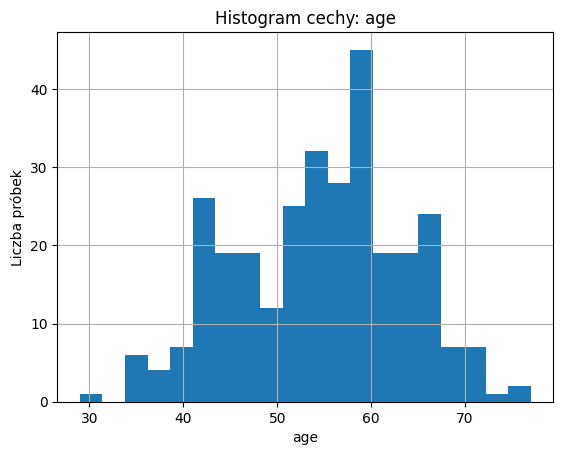

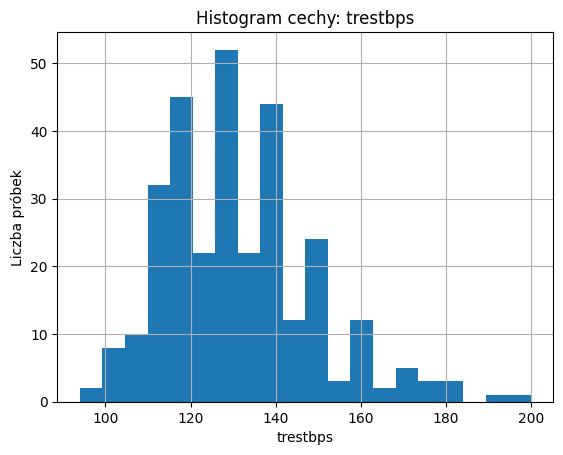

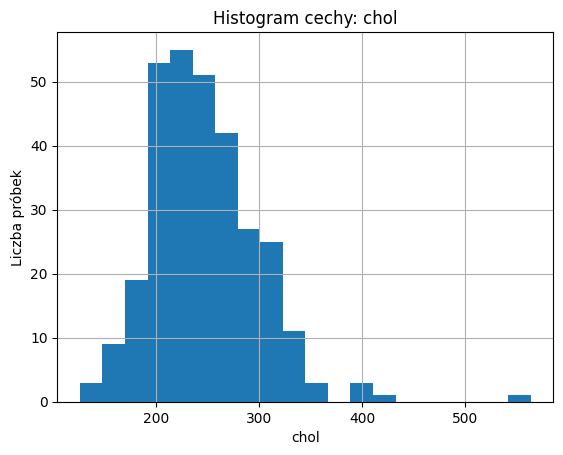

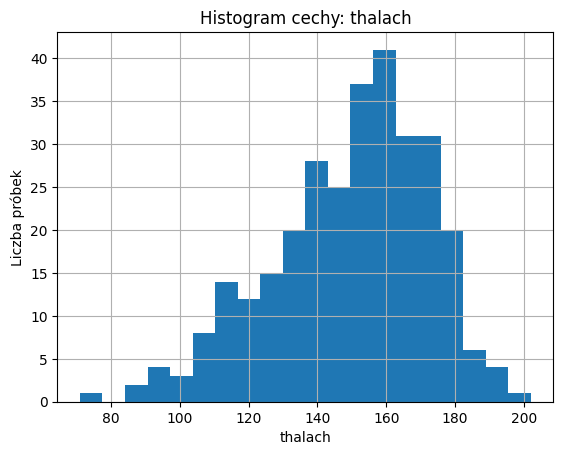

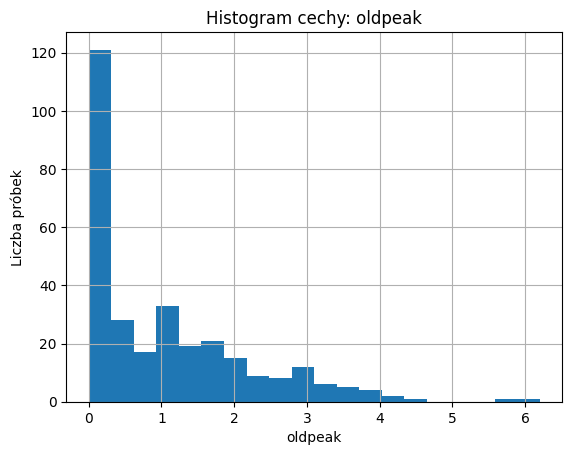

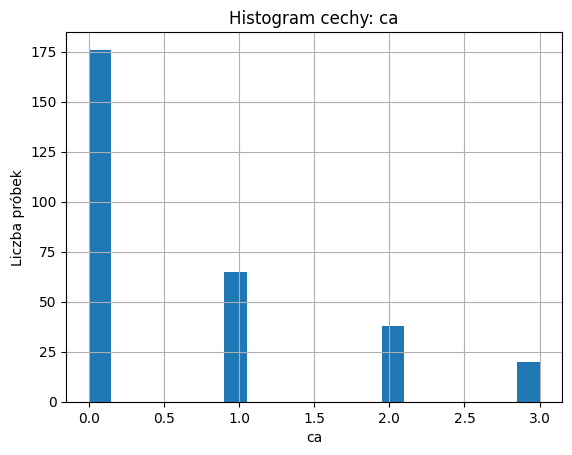

In [12]:
for col in integer_cols:
    plt.figure()
    X[col].hist(bins=20)
    plt.title(f'Histogram cechy: {col}')
    plt.xlabel(col)
    plt.ylabel('Liczba próbek')
    plt.show()

**Wnioski:**

* Cechy liczbowe takie jak `age`, `trestbps`, `chol`, `thalach` mają rozkłady zbliżone do normalnego.
* Cechy `oldpeak` i `ca` nie mają normalnego rozkładu: wiele obserwacji ma wartość 0 lub bliskie 0, a mniejsza liczba pacjentów ma wyższe wartości.
* Taki rozkład wynika z faktu, że u większości pacjentów ST depression (`oldpeak`) jest niskie lub zerowe, a tylko nieliczni pacjenci osiągają wyższe wartości.
* Dla (`ca`), większość pacjentów ma 0 naczyń, a tylko nieliczni mają 1 lub więcej, co prowadzi do rozkładu z dużą liczbą zer.


# Zad4. Dla cech kategorycznych: czy rozkład jest w przybliżeniu równomierny?

Rozkład dla cechy: sex
sex
1    206
0     97
Name: count, dtype: int64


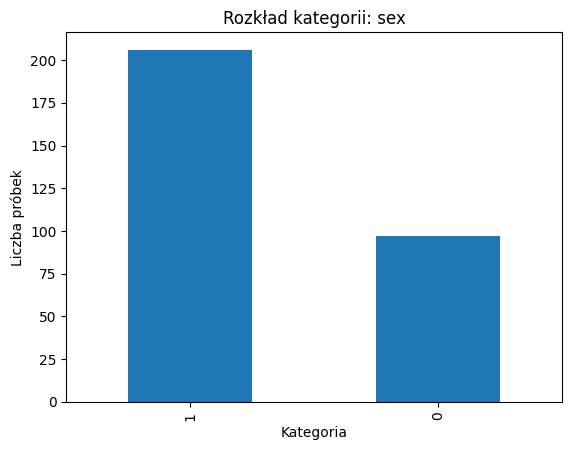

Rozkład dla cechy: cp
cp
4    144
3     86
2     50
1     23
Name: count, dtype: int64


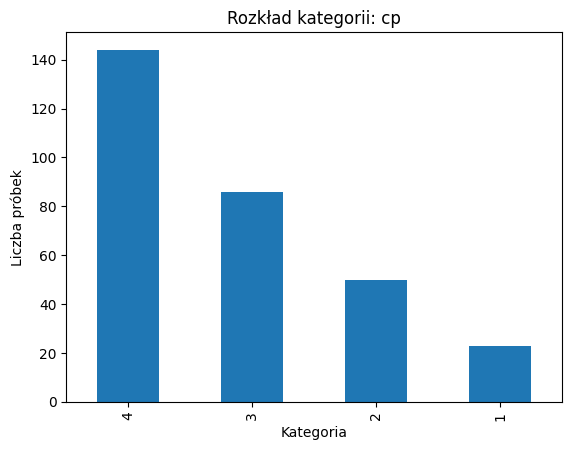

Rozkład dla cechy: fbs
fbs
0    258
1     45
Name: count, dtype: int64


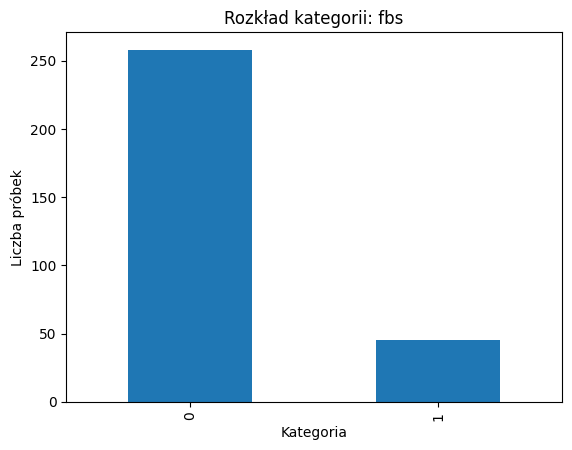

Rozkład dla cechy: restecg
restecg
0    151
2    148
1      4
Name: count, dtype: int64


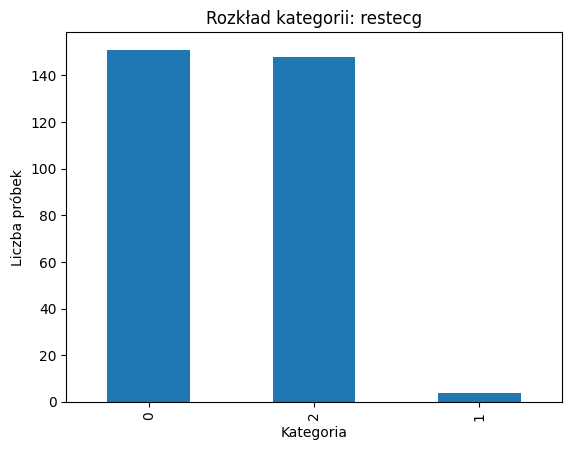

Rozkład dla cechy: exang
exang
0    204
1     99
Name: count, dtype: int64


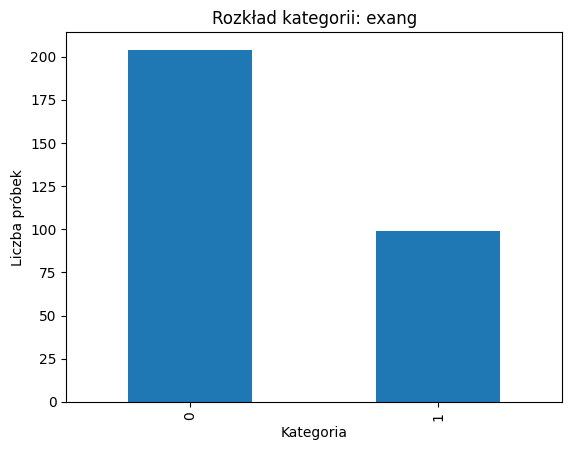

Rozkład dla cechy: slope
slope
1    142
2    140
3     21
Name: count, dtype: int64


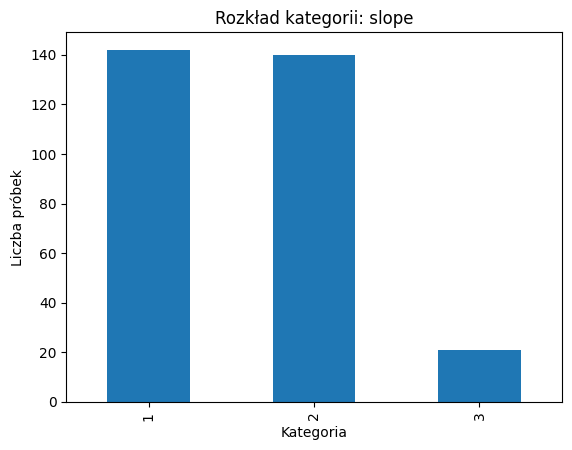

Rozkład dla cechy: thal
thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64


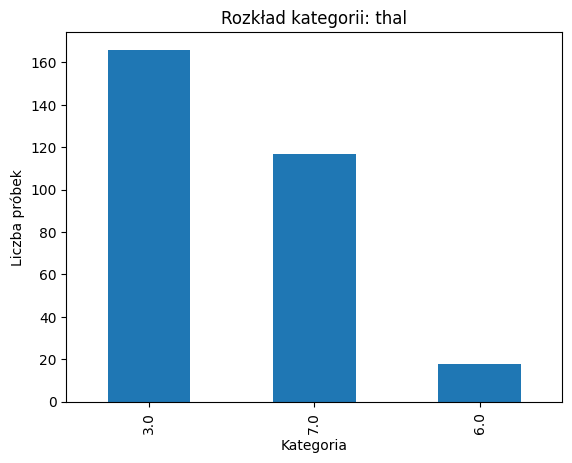

In [13]:
for col in categorical_cols:
    counts = X[col].value_counts()
    print(f'Rozkład dla cechy: {col}')
    print(counts)
    counts.plot(kind='bar')
    plt.title(f'Rozkład kategorii: {col}')
    plt.xlabel('Kategoria')
    plt.ylabel('Liczba próbek')
    plt.show()

**Wnioski  dla każdej cechy:**

1. **sex**
   * W zbiorze dominują mężczyźni (ok. 68%), kobiety stanowią mniejszość.

2. **cp** 
   * Rozkład nierównomierny: najwięcej pacjentów ma typ 4 i z każdą kolejną kategorią jest mniej pacjentów.

3. **fbs** 
   * Większość pacjentów ma 0, czyli glukoza nieprzekraczająca 120 mg/dl.

4. **restecg**
   * Najwięcej pacjentów ma wynik 0 lub 2, wynik 1 jest bardzo rzadki (4). 

5. **exang** 
   * Większość pacjentów nie doświadcza dławicy podczas wysiłku.

6. **slope**
   * Najczęściej występuje kategoria 1 i 2, kategoria 3 jest rzadsza.

7. **thal** 
   * Najwięcej pacjentów ma kategorię 3 lub 7, kategoria 6 jest rzadziej.

**Wnioski ogólne:**

* Żadna cecha kategoryczna nie ma równomiernego rozkładu.
* Niektóre kategorie są rzadko reprezentowane, co należy uwzględnić przy dalszej analizie i modelowaniu


# Zad5. Czy występują cechy brakujące i jaką strategię możemy zastosować żeby je zastąpić?

In [14]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [15]:
missing_rows = X[X.isnull().any(axis=1)]

missing_rows[['ca', 'thal']]

,ca,thal
87,0.0,NaN
166,NaN,3.0
192,NaN,7.0
266,0.0,NaN
287,NaN,7.0
302,NaN,3.0


Występują braki danych w cechach `ca` (4 braki) i `thal` (2 braki).

Najlepszym rozwiązaniem będzie usunięcie rekordów z brakami, ponieważ liczba brakujących wartości jest niewielka w porównaniu do całkowitej liczby próbek (303). Usunięcie tych kilku rekordów nie powinno znacząco wpłynąć na wyniki. 

Jeśli jednak chcielibśmy zastąpić braki, mozemy rozważyć następującą strategię:
- Dla wartości numerycznych użyć średniej
- Dla wartości kategorycznych użyć wartości modalnej

Jednak może to wprowadzić problemy, ponieważ `ca` przyjmuje tylko wartości całkowite od 0 do 3, więc zastąpienie średnią może prowadzić do wartości niecałkowitych. W takim przypadku lepszym podejściem byłoby użycie najczęstszej wartości (moda).

Dla `ca` i `thal` użycie wartości modalnej będzie najbezpieczniejszym rozwiązaniem.

In [16]:

print("Moda 'ca':", X['ca'].mode()[0])
print("Moda 'thal':", X['thal'].mode()[0])

X.loc[:, 'ca'] = X['ca'].fillna(X['ca'].mode()[0])
X.loc[:, 'thal'] = X['thal'].fillna(X['thal'].mode()[0])

X.isnull().sum()

Moda 'ca': 0.0
Moda 'thal': 3.0


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

#### Wyswietlamy wiersze, które miały wcześniej NaN

In [17]:
missing_indices = [87, 166, 192, 266, 287, 302]

filled_missing_rows = X.loc[missing_indices]
filled_missing_rows[['ca', 'thal']]

,ca,thal
87,0.0,3.0
166,0.0,3.0
192,0.0,7.0
266,0.0,3.0
287,0.0,7.0
302,0.0,3.0


# Kod przekształcający dane do macierzy cech liczbowych

In [18]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Wczytanie danych
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets['num']

# Identyfikacja cech kategorycznych i liczbowych
categorical_cols = heart_disease.variables[heart_disease.variables['type'] == 'Categorical']['name'].tolist()
integer_cols = heart_disease.variables[heart_disease.variables['type'] == 'Integer']['name'].tolist()
if 'num' in integer_cols:
    integer_cols.remove('num')  

# Usunięcie wierszy z brakującymi wartościami
X = X.dropna()
y = y[X.index] 

print("Rozmiar macierzy cech przed: ", X.shape)

# One-hot encoding dla cech kategorycznych
X_encoded = pd.get_dummies(X, columns=categorical_cols, dtype=int)

# Macierz cech 
X_matrix = X_encoded.values
print(type(X_matrix))

print("\nRozmiar macierzy cech:", X_matrix.shape)

print(X_matrix[:5])

X_encoded.head()

Rozmiar macierzy cech przed:  (297, 13)
<class 'numpy.ndarray'>

Rozmiar macierzy cech: (297, 25)
[[ 63.  145.  233.  150.    2.3   0.    0.    1.    1.    0.    0.    0.
    0.    1.    0.    0.    1.    1.    0.    0.    0.    1.    0.    1.
    0. ]
 [ 67.  160.  286.  108.    1.5   3.    0.    1.    0.    0.    0.    1.
    1.    0.    0.    0.    1.    0.    1.    0.    1.    0.    1.    0.
    0. ]
 [ 67.  120.  229.  129.    2.6   2.    0.    1.    0.    0.    0.    1.
    1.    0.    0.    0.    1.    0.    1.    0.    1.    0.    0.    0.
    1. ]
 [ 37.  130.  250.  187.    3.5   0.    0.    1.    0.    0.    1.    0.
    1.    0.    1.    0.    0.    1.    0.    0.    0.    1.    1.    0.
    0. ]
 [ 41.  130.  204.  172.    1.4   0.    1.    0.    0.    1.    0.    0.
    1.    0.    0.    0.    1.    1.    0.    1.    0.    0.    1.    0.
    0. ]]


,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_1,cp_2,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0.0,0,1,1,0,...,0,1,1,0,0,0,1,0,1,0
1,67,160,286,108,1.5,3.0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
2,67,120,229,129,2.6,2.0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,37,130,250,187,3.5,0.0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
4,41,130,204,172,1.4,0.0,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0
